In [1]:
import tensorflow as tf
import numpy as np
np.random.seed(123)
tf.random.set_seed(123)

In [2]:

#https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras
#Data: http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data
    
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix


def create_model():
    # load dataset
    dataframe = read_csv("data/ionosphere.csv", header=None)
    dataset = dataframe.values

    # split into input (X) and output (Y) variables
    X = dataset[:,0:34].astype(float)
    Y = dataset[:,34]

    # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(Y)
    Y = encoder.transform(Y)

    # create model
    model = Sequential()
    model.add(Dense(34, input_dim=34, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    return model,X_train, X_test, y_train, y_test


def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    

0.3095332086086273 0.9014084339141846


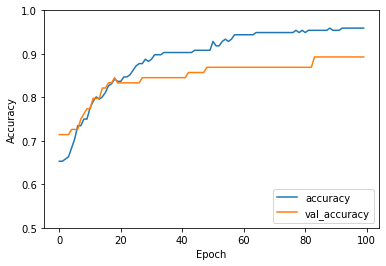

In [3]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
epochs = 100
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.30, epochs=epochs, batch_size=10, verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

# Early stopping

0.3199666738510132 0.8873239159584045


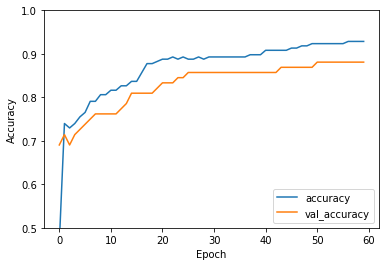

In [4]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# min_delta compares min_delta threshold with the validation accuracy. 
# min_delta=0.005 It means that the accuracy should at least improve 0.005
# patience = 2, training terminates immediately after it passes 2 epochs without improvement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=2)

history = model.fit(X_train, y_train, validation_split=0.30, epochs=epochs, batch_size=10, callbacks=[callback], verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

# Learning Rate

0.2221049666404724 0.9295774698257446


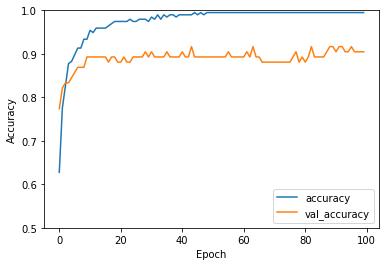

In [5]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
learning_rate = 0.05
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.30, epochs=epochs, batch_size=10, verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

0.20426729321479797 0.9154929518699646


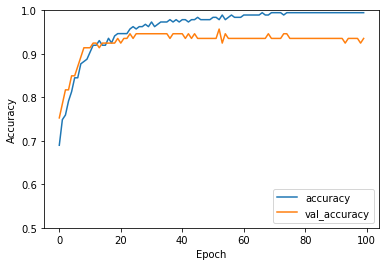

In [6]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
learning_rate = 0.1
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=epochs, batch_size=28, verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

0.38573116064071655 0.8450704216957092


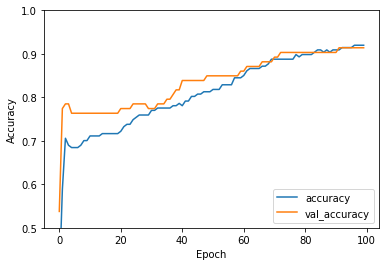

In [7]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
learning_rate = 0.01
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# Fit the model
history = model.fit(X_train, y_train, validation_split=0.33, epochs=epochs, batch_size=28, verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

0.3844221234321594 0.8450704216957092


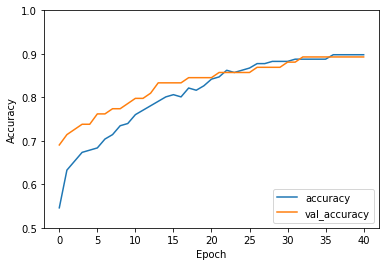

In [8]:
model,X_train, X_test, y_train, y_test = create_model()
# Compile model
learning_rate = 0.01
sgd = SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.005, patience=2)
history = model.fit(X_train, y_train, validation_split=0.30, epochs=epochs, batch_size=10, callbacks=[callback], verbose=0)
plot_history(history)

loss, acc = model.evaluate(X_test,  y_test, verbose=0)
print(loss, acc)

# Prunning

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9154929577464789

In [24]:
clf = RandomForestClassifier(ccp_alpha=0.01, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9014084507042254

# Dropout 

training: (50000, 32, 32, 3) (50000, 1)
testing: (10000, 32, 32, 3) (10000, 1)


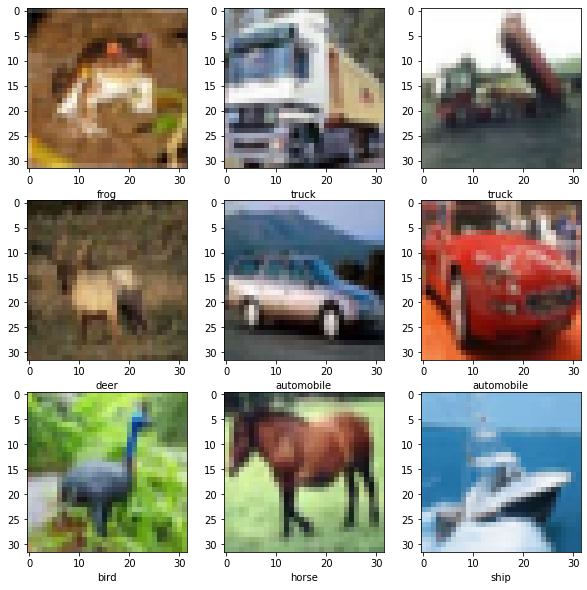

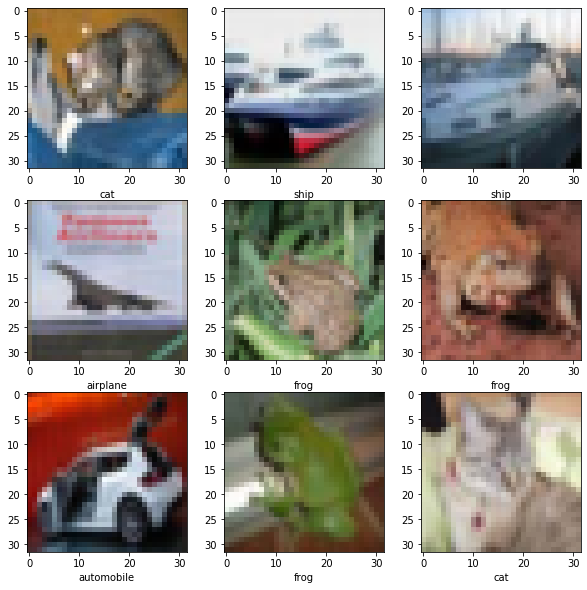

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)         

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras import datasets, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

#load data
(train_X, train_Y), (test_X, test_Y) = datasets.cifar10.load_data()

#show shape of training and testing sets
print('training:', train_X.shape, train_Y.shape) 
#training: (50000, 32, 32, 3) (50000, 1) -> it means that there are 50000 images.
print('testing:', test_X.shape, test_Y.shape) 
#testing: (10000, 32, 32, 3) (10000, 1) -> -> it means that there are 10000 images.
#show some images from training and testing sets, print the class associeted with each image
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_X[i,:,:])
    plt.xlabel(classes[train_Y[i][0]])
plt.show()
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[i,:,:])
    plt.xlabel(classes[test_Y[i][0]])
plt.show()

#scale data
#pixels values are between 0 and 255 -> divide by 255 to scale data between 0 and 1
train_X = train_X / 255
test_X = test_X / 255

#create output layer with n nodes and softmax function, (n=#classes). 
output_layer = Dense(len(classes), activation='softmax')

#create the model
model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=10, 
                    validation_data=(test_X, test_Y))

0.6937000155448914


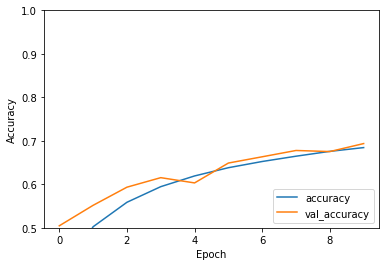

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
loss, acc = model.evaluate(test_X,  test_Y, verbose=0)
print(acc)